# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [18]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"



In [19]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
study_results
mouse_metadata

# Combine the data into a single DataFrame
mouse_study = pd.merge(mouse_metadata, study_results, on='Mouse ID')

# Display the data table for preview
mouse_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [20]:
# Checking the number of mice.
mouse_count = len(mouse_study.groupby('Mouse ID').count())
mouse_count

249

In [21]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
print(f'number of mice: {mouse_count}')
duplicate_mice = mouse_study[mouse_study.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_mice

number of mice: 249


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [24]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice = mouse_study[mouse_study['Mouse ID'].isin(duplicate_mice)==False]

In [27]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_count = len(clean_mice.groupby('Mouse ID').count())
clean_mouse_count

249

## Summary Statistics

In [36]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mouse_summary = clean_mice.groupby(['Drug Regimen'])

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

# mean
tumor_vol_mean = mouse_summary['Tumor Volume (mm3)'].mean()

# median
tumor_vol_med = mouse_summary['Tumor Volume (mm3)'].median()

# variance
tumor_vol_var = mouse_summary['Tumor Volume (mm3)'].var()

# standard deviation
tumor_vol_std = mouse_summary['Tumor Volume (mm3)'].std()

# SEM of the tumor volume
tumor_vol_sem = mouse_summary['Tumor Volume (mm3)'].sem()


# Assemble the resulting series into a single summary DataFrame.
mouse_summary_df = pd.DataFrame({'mean' : tumor_vol_mean,
                                 'median' : tumor_vol_med,
                                 'variance' : tumor_vol_var,
                                 'standard deviation' : tumor_vol_std,
                                 'sem' : tumor_vol_sem})
mouse_summary_df

,mean,median,variance,standard deviation,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [38]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
agg_mouse_summary_df = mouse_summary['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
agg_mouse_summary_df.head()

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar and Pie Charts

<Axes: title={'center': 'Regimen for Mice'}, xlabel='Drug Regimen', ylabel='Number of Mice'>

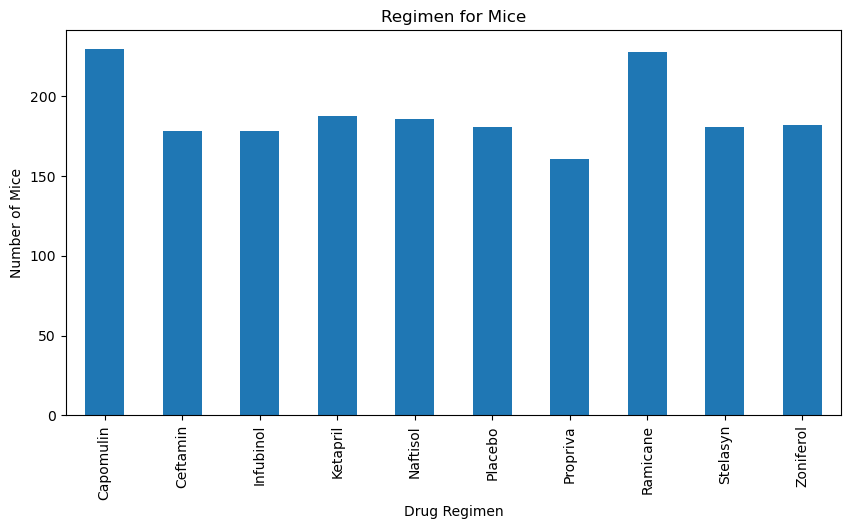

In [44]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bar_mouse = clean_mice.groupby(['Drug Regimen']).count()['Mouse ID']

plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice')
plt.title('Total Number of Mice for Each Regiment')

bar_mouse.plot.bar(title = 'Regimen for Mice', y='Number of Mice', figsize=(10,5))

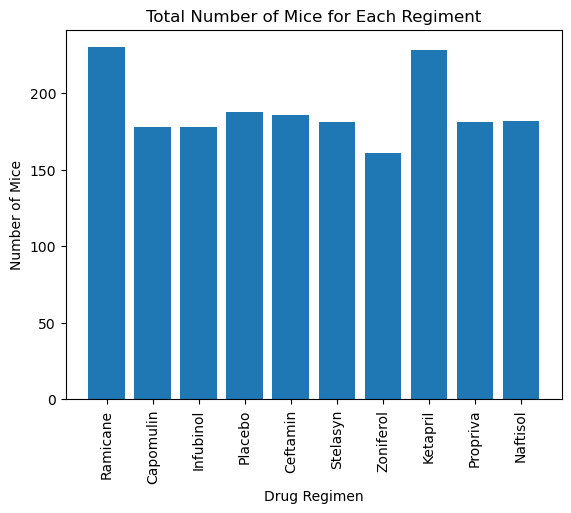

In [45]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_names = clean_mice['Drug Regimen'].unique()

x_axis = drug_names
y_axis = clean_mice.groupby(['Drug Regimen']).count()['Mouse ID']
tick_locations = x_axis
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice')
plt.title('Total Number of Mice for Each Regiment')

plt.bar(x_axis, y_axis)
plt.xticks(tick_locations, rotation= 90)
plt.show()

Sex
Male      958
Female    935
Name: count, dtype: int64


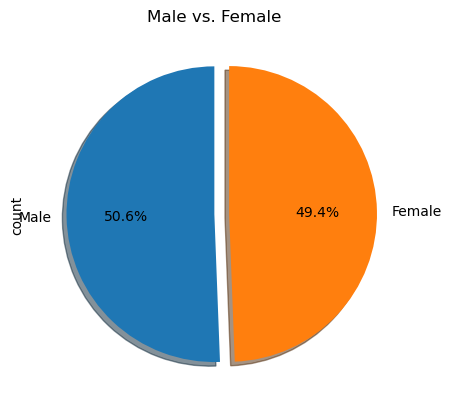

In [56]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_gender = clean_mice['Sex'].value_counts()
print(mouse_gender)

mouse_gender.plot(kind='pie', y='', autopct="%1.1f%%", startangle=90, shadow=True,explode=(0,0.1))
plt.title('Male vs. Female')
plt.show()

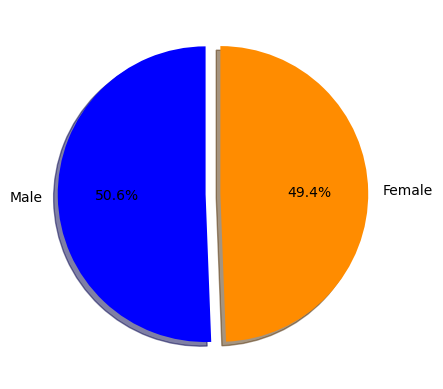

In [62]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
size = [958, 935]
colors = ["blue", "darkorange"]
explode = (0, 0.1)

plt.pie(size, labels=labels, colors=colors, explode=explode,
       autopct="%1.1f%%", shadow=True, startangle=90)

plt.show()

## Quartiles, Outliers and Boxplots

In [63]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint_df = clean_mice.groupby(['Mouse ID'])['Timepoint'].max().reset_index()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
max_timepoint_df = greatest_timepoint_df.merge(clean_mice, on=['Mouse ID', 'Timepoint'], how='left')
print(max_timepoint_df.head())

treatment_names = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

for name in range(len(treatment_names)):
    temp = max_timepoint_df[max_timepoint_df['Drug Regimen'] == treatment_names[name]]

  Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
0     a203         45    Infubinol  Female          20          23   
1     a251         45    Infubinol  Female          21          25   
2     a262         45      Placebo  Female          17          29   
3     a275         45     Ceftamin  Female          20          28   
4     a366         30     Stelasyn  Female          16          29   

   Tumor Volume (mm3)  Metastatic Sites  
0           67.973419                 2  
1           65.525743                 1  
2           70.717621                 4  
3           62.999356                 3  
4           63.440686                 1  


In [67]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = {'Capomulin' : [],
                 'Ramicane': [],
                 'Infubinol': [],
                 'Ceftamin': []}

#tumor_vol_final
relevant_tumor = {'Capomulin' : [],
                 'Ramican' : [],
                 'Infubinol' : [],
                 'Ceftamin' : []}

# Loop
for name in treatment_names:
    #Loop thru regiments highest timepoint
    for i in max_timepoint_df.index:
        # Append the tumor vol to the list
        if max_timepoint_df.iloc[i]['Drug Regimen'] == name:
            tumor_vol_data[name].append(max_timepoint_df.iloc[i]['Tumor Volume (mm3)'])
            
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for name in treatment_names: 
    # Subset
    subset = max_timepoint_df[max_timepoint_df['Drug Regimen']== name]
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    quartiles = subset['Tumor Volume (mm3)'].quantile([0.25,0.5,0.75])
    first_q = quartiles[0.25]
    second_q = quartiles[0.5]
    third_q = quartiles[0.75]
    iqr = third_q = first_q
    # Bounds
    lower_b = first_q - (1.5*iqr)
    upper_b = third_q + (1.5*iqr)


    
    # Determine outliers using upper and lower bounds
    outliers = max_timepoint_df.loc[(max_timepoint_df['Tumor Volume (mm3)'] <= lower_b) | (max_timepoint_df['Tumor Volume (mm3)'])]
print(outliers)


    Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
0       a203         45    Infubinol  Female          20          23   
1       a251         45    Infubinol  Female          21          25   
2       a262         45      Placebo  Female          17          29   
3       a275         45     Ceftamin  Female          20          28   
4       a366         30     Stelasyn  Female          16          29   
..       ...        ...          ...     ...         ...         ...   
244     z435         10     Propriva  Female          12          26   
245     z578         45     Ramicane    Male          11          16   
246     z581         45    Infubinol  Female          24          25   
247     z795         45     Naftisol  Female          13          29   
248     z969         45     Naftisol    Male           9          30   

     Tumor Volume (mm3)  Metastatic Sites  
0             67.973419                 2  
1             65.525743                 1  
2  

TypeError: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

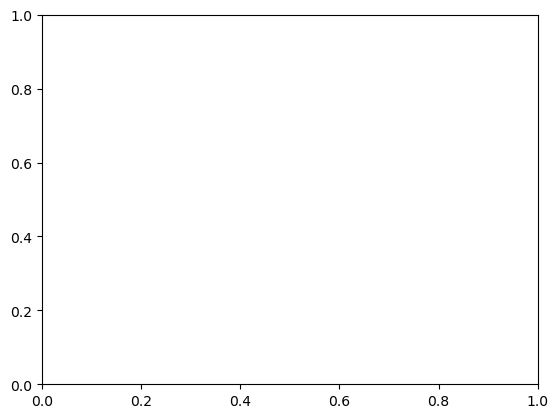

In [70]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
flierprops = dict(marker='g', markerfacecolor='o', markersize=8, markeredgecolor='black')

plt.boxplot(drug_names, flierprops=flierprops)

# Title & labels
plt.title('final Tumor Volume by Drug')
plt.ylabel('Final Tumor Volume(mm3)')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

plt.show()

## Line and Scatter Plots

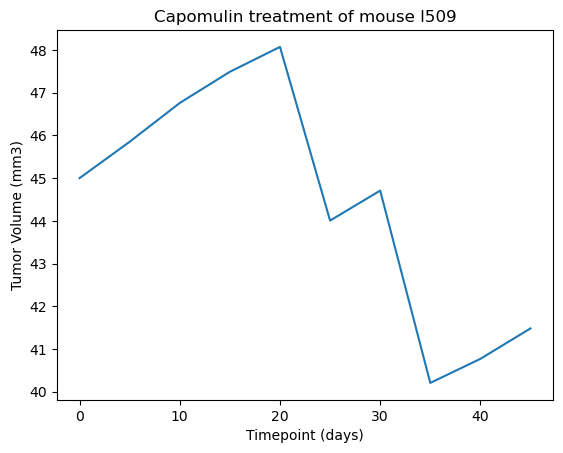

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


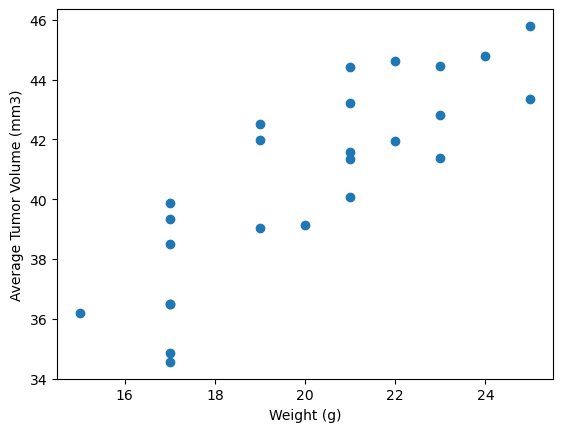

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


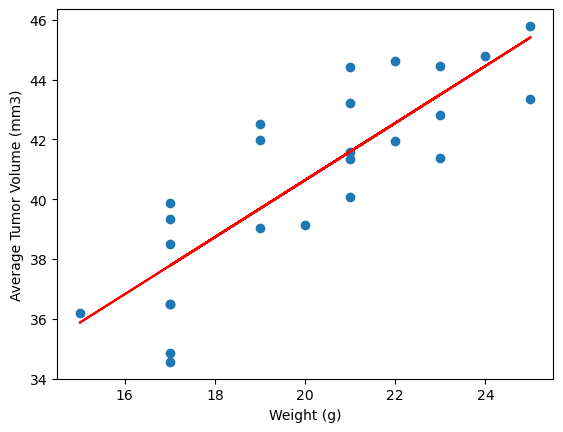

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
